# Домашее задание "деревья решений"

### На основе датасета titanic обучить дерево решений

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [5]:
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [6]:
train = pd.get_dummies(train, columns=['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [7]:
train.drop(['Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [8]:
train.dropna(inplace = True)

In [9]:
x = train.drop('Survived', axis=1)
y = train.Survived

In [10]:
dt.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
gs = pd.read_csv('titanic/gender_submission.csv')
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
test = test.merge(gs, on='PassengerId', how='left')

In [13]:
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test = pd.get_dummies(test, columns=['Embarked'])
test.drop(['Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)
test.dropna(inplace = True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0,0,1,0
1,893,3,0,47.0,1,0,7.0000,1,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,0,1
4,896,3,0,22.0,1,1,12.2875,1,0,0,1


In [14]:
xt = test.drop('Survived', axis=1)
yt = test.Survived

In [15]:
yp = dt.predict(xt)

In [16]:
from sklearn import metrics

In [17]:
metrics.roc_auc_score(yt, yp)

0.7626022850084917

### Подобрать оптимальную глубину дерева так же, как мы делали на занятии

In [18]:
from sklearn.model_selection import GridSearchCV
import numpy as np

depths = np.arange(1,20)
grid = {'max_depth': depths}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [19]:
gridsearch.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [20]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00319242, 0.00279989, 0.00299993, 0.00300827, 0.00359497,
        0.00360003, 0.00357771, 0.00419679, 0.00399761, 0.00418429,
        0.00422077, 0.00399947, 0.00422029, 0.00399914, 0.00420156,
        0.00417886, 0.00419931, 0.00439997, 0.00419984]),
 'std_fit_time': array([3.90284616e-04, 4.00138111e-04, 1.06196677e-06, 2.02740483e-05,
        4.96676125e-04, 4.89901429e-04, 4.72199706e-04, 3.98582519e-04,
        4.34785549e-06, 3.82284201e-04, 3.89920139e-04, 5.14674977e-06,
        3.90003896e-04, 2.86102295e-07, 7.48042684e-04, 4.02197447e-04,
        4.00283264e-04, 4.90018485e-04, 3.99780529e-04]),
 'mean_score_time': array([0.00200305, 0.00180001, 0.00180116, 0.00179248, 0.00139599,
        0.00158916, 0.00182166, 0.00160084, 0.00120029, 0.00200505,
        0.00158987, 0.00179181, 0.00140195, 0.00200062, 0.00159869,
        0.00181065, 0.00159974, 0.00160017, 0.00160017]),
 'std_score_time': array([6.63917621e-06, 4.02906925e-04, 4.00025925e-04, 4.17

In [21]:
from matplotlib import pyplot as plt
scores = [-x for x in gridsearch.cv_results_['mean_test_score']]
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)
plt.show()

<Figure size 640x480 with 1 Axes>

In [22]:
dt = DecisionTreeClassifier(max_depth=2)

In [23]:
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
yp = dt.predict(xt)

In [25]:
metrics.roc_auc_score(yt, yp)

0.7835417631619578

### Определить самые важные фичи

In [26]:
dt.feature_importances_

array([0.        , 0.20714991, 0.71563891, 0.07721118, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

### Визуализировать полученное дерево

In [27]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [31]:
x.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

[Text(167.4, 181.2, 'Sex <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(83.7, 108.72, 'Pclass <= 2.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(41.85, 36.23999999999998, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]'),
 Text(251.10000000000002, 108.72, 'Age <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(209.25, 36.23999999999998, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(292.95, 36.23999999999998, 'gini = 0.295\nsamples = 429\nvalue = [352, 77]')]

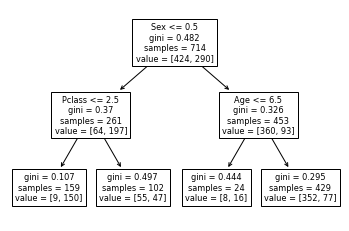

In [34]:
from sklearn import tree
tree.plot_tree(dt, feature_names = x.columns)